RBF для предсказания функции sin(x)

Входные значения: [0.55293827 0.56927897 0.85371588 0.64206682 0.00852771]
Ожидаемые значения: ['0.5251899137', '0.5390248730', '0.7537276340', '0.5988519516', '0.0085276040']
Полученные значения: ['0.5221475528', '0.5377877835', '0.7524773587', '0.6041364423', '0.0087675085']
E = 0.0063508216084587335


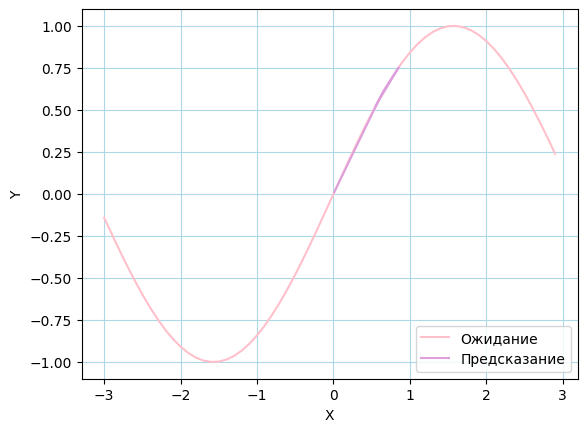

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

class RBF:
    def __init__(self, neurons_count, sigma=1.0):
        self.neurons_count = neurons_count
        self.sigma = sigma
        self.weights = None
        self.centers = None

    def gauss(self, center, data_point): #Гауссова функция
        return np.exp(-self.sigma * np.linalg.norm(data_point-center)**2)

    def new_centers(self, X): #Выбор случайного центра
        random_args = np.random.choice(len(X), self.neurons_count)
        centers = X[random_args]
        #print('Центры:', centers)
        return centers

    def matrix(self, X): #Строим матрицу F
        F = np.zeros((len(X), self.neurons_count))
        for data_point_arg, data_point in enumerate(X):
            for center_arg, center in enumerate(self.centers):
                F[data_point_arg, center_arg] = self.gauss(center, data_point)
        return F

    def calculate_weights(self, X, Y): #Считаем веса
        self.centers = self.new_centers(X) #Вызов функции выбора центра
        F = self.matrix(X)
        self.weights = np.dot(np.linalg.pinv(F), Y) # Псевдообратная матрица на ожидаемый результат


    def predict(self, X):
        F = self.matrix(X)
        predict = np.dot(F, self.weights)
        return predict



X = np.random.random(5)
D = np.sin(X) #Ожидаемые значения
net = RBF(neurons_count = 5)
net.calculate_weights(X, D)
Y = net.predict(X) #Полученные значения
E = math.sqrt(np.sum(np.array([pow(x, 2) for x in (D - Y)])))
print('Входные значения:', X)
print('Ожидаемые значения:', [*[f"{i:.10f}" for i in D]])
print('Полученные значения:', [*[f"{i:.10f}" for i in Y]])
print('E =', E)
X1 = np.arange(-3, 3, 0.1)
D1 = np.sin(X1)

plt.plot(X1, D1, color = 'pink', label='Ожидание')
plt.plot(X, Y, 'plum', label='Предсказание')
plt.legend(loc='lower right')
plt.ylabel('Y')
plt.xlabel('X')
plt.grid(color='lightblue')
plt.show()

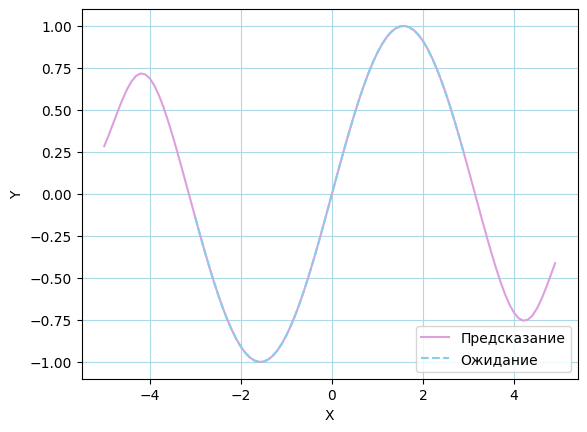

In [ ]:
X = np.arange(-3, 3, 0.1)
D = np.sin(X) #Ожидаемые значения
net = RBF(neurons_count = len(X))
net.calculate_weights(X, D)
X1 = np.arange(-5, 5, 0.1)
Y1 = net.predict(X1)
plt.plot(X1, Y1, 'plum', label='Предсказание')
plt.plot(X, D, '--',color = 'skyblue', label='Ожидание')
plt.legend(loc='lower right')
plt.ylabel('Y')
plt.xlabel('X')
plt.grid(color='lightblue')
plt.show()